<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CognoRise-InfoTech-TASK-2-SENTIMENT-ANALYSIS-AI-AI/blob/main/SENTIMENT_ANALYSIS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Song Lyrics Sentiment Analysis And Literary Sentiment Analysis***

#***Song Lyrics Sentiment Analysis:***

In [1]:
pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.9 MB/s eta 0:00:00


##*Import Libraries*



In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import emoji

##*Ensure nltk resources are downloaded*

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##*List of CSV files for different artists*

In [4]:
files = ['/content/ArianaGrande.csv', '/content/BillieEilish.csv', '/content/EdSheeran.csv', '/content/Eminem.csv', '/content/TaylorSwift.csv']


##*Combine datasets*

In [5]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    artist_name = file.split('/')[-1].split('.')[0]  # Extract artist name from file name
    df['artist'] = artist_name  # Add an 'artist' column
    dfs.append(df)

##*Concatenate all dataframes*

In [6]:
df_combined = pd.concat(dfs, ignore_index=True)

##*Display the first few rows of the combined dataset*

In [7]:
print(df_combined.head())
print(df_combined.columns)

          Artist                   Title            Album        Date  \
0  Ariana Grande          ​thank u, next    thank u, next  2018-11-03   
1  Ariana Grande                 7 rings    thank u, next  2019-01-18   
2  Ariana Grande         ​God is a woman        Sweetener  2018-07-13   
3  Ariana Grande            Side To Side  Dangerous Woman  2016-05-20   
4  Ariana Grande  ​​no tears left to cry        Sweetener  2018-04-20   

                                               Lyric    Year        artist  \
0  thought i'd end up with sean but he wasn't a m...  2018.0  ArianaGrande   
1  yeah breakfast at tiffany's and bottles of bub...  2019.0  ArianaGrande   
2  you you love it how i move you you love it how...  2018.0  ArianaGrande   
3  ariana grande  nicki minaj i've been here all ...  2016.0  ArianaGrande   
4  right now i'm in a state of mind i wanna be in...  2018.0  ArianaGrande   

   Unnamed: 0  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         Na

##*Initialize lemmatizer and stopwords*

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

##*Apply preprocessing*

In [9]:
df_combined['Lyric'] = df_combined['Lyric'].fillna('').astype(str)
df_combined['cleaned_lyrics'] = df_combined['Lyric'].apply(preprocess_text)


##*Perform sentiment analysis*

In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_combined['sentiment'] = df_combined['cleaned_lyrics'].apply(get_sentiment)

##*Categorize sentiment*

In [11]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_combined['sentiment_category'] = df_combined['sentiment'].apply(categorize_sentiment)

##*Visualization*

*Set up the visualization style*

In [12]:
sns.set(style="whitegrid")

###*1. Sentiment Distribution by Artist*


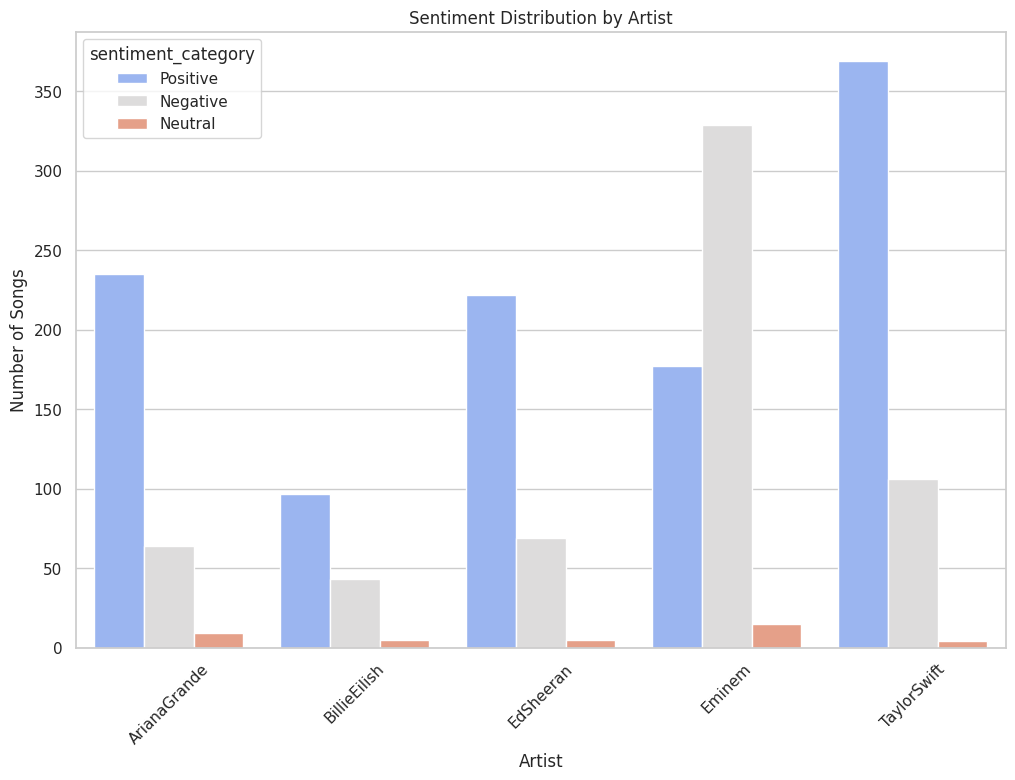

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='artist', hue='sentiment_category', data=df_combined, palette='coolwarm')
plt.title('Sentiment Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

###*2. Histograms for Positive and Negative Sentiment Scores*

In [13]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

####*Positive sentiment*


Text(0, 0.5, 'Frequency')

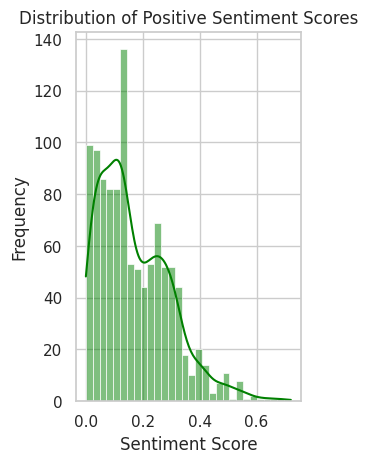

In [14]:
plt.subplot(1, 2, 1)
sns.histplot(df_combined[df_combined['sentiment'] > 0]['sentiment'], kde=True, bins=30, color='green')
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

####*Negative sentiment*

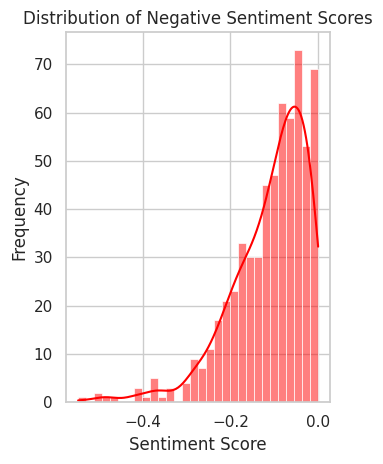

In [15]:
plt.subplot(1, 2, 2)
sns.histplot(df_combined[df_combined['sentiment'] < 0]['sentiment'], kde=True, bins=30, color='red')
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###*3. Word Cloud for All Lyrics Combined*

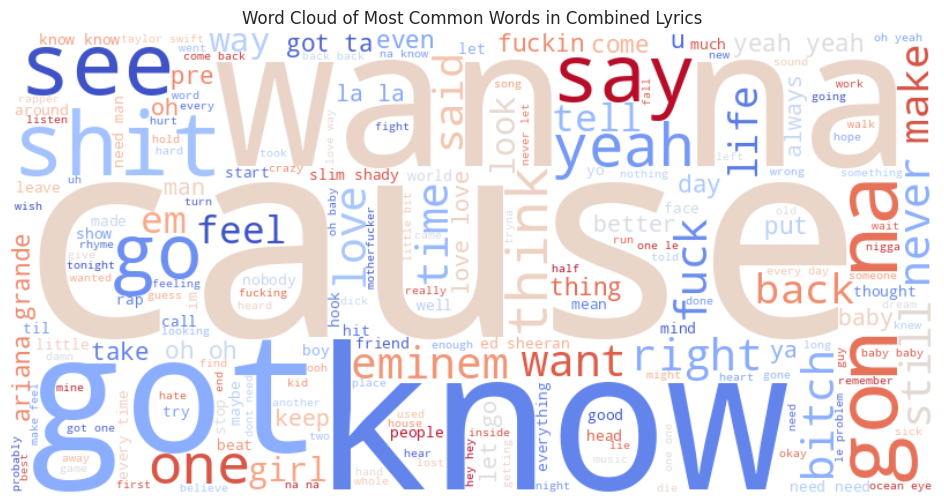

In [16]:
all_lyrics = ' '.join(df_combined['cleaned_lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(all_lyrics)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Combined Lyrics')
plt.show()

###*4. Circular Graphs for Sentiment Distribution*


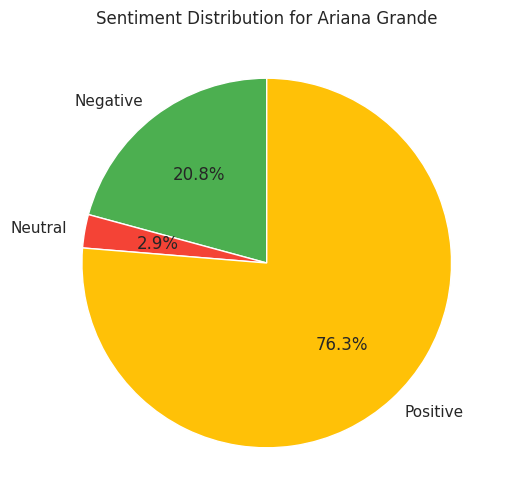

In [17]:
import matplotlib.pyplot as plt

# Compute the sentiment distribution for each artist
artist_sentiment_distribution = df_combined.groupby('artist')['sentiment_category'].value_counts().unstack().fillna(0)
artist_sentiment_distribution = artist_sentiment_distribution.div(artist_sentiment_distribution.sum(axis=1), axis=0) * 100

# Plot pie chart for Ariana Grande
plt.figure(figsize=(6, 6))
plt.pie(artist_sentiment_distribution.loc['ArianaGrande'], labels=artist_sentiment_distribution.columns,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution for Ariana Grande')
plt.show()

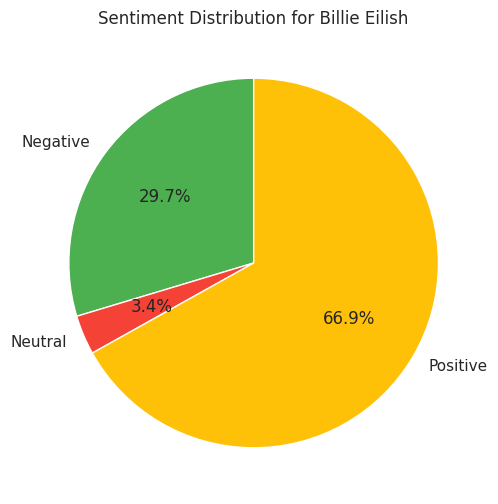

In [18]:
# Plot pie chart for Billie Eilish
plt.figure(figsize=(6, 6))
plt.pie(artist_sentiment_distribution.loc['BillieEilish'], labels=artist_sentiment_distribution.columns,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution for Billie Eilish')
plt.show()

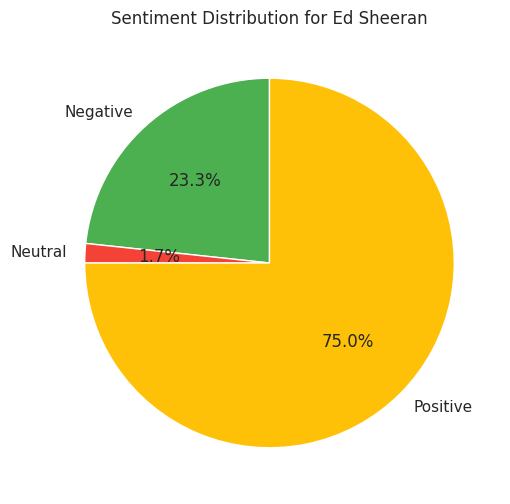

In [19]:
# Plot pie chart for Ed Sheeran
plt.figure(figsize=(6, 6))
plt.pie(artist_sentiment_distribution.loc['EdSheeran'], labels=artist_sentiment_distribution.columns,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution for Ed Sheeran')
plt.show()

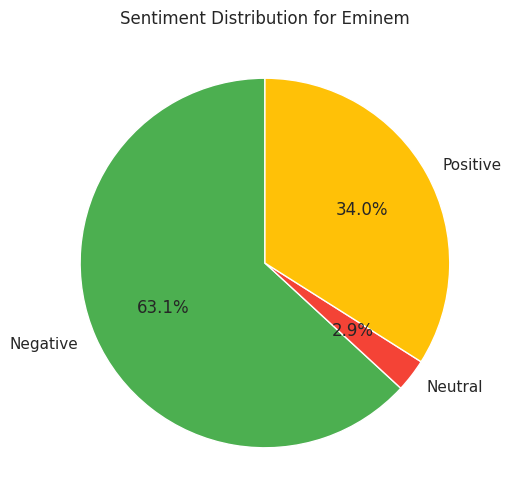

In [20]:
# Plot pie chart for Eminem
plt.figure(figsize=(6, 6))
plt.pie(artist_sentiment_distribution.loc['Eminem'], labels=artist_sentiment_distribution.columns,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution for Eminem')
plt.show()

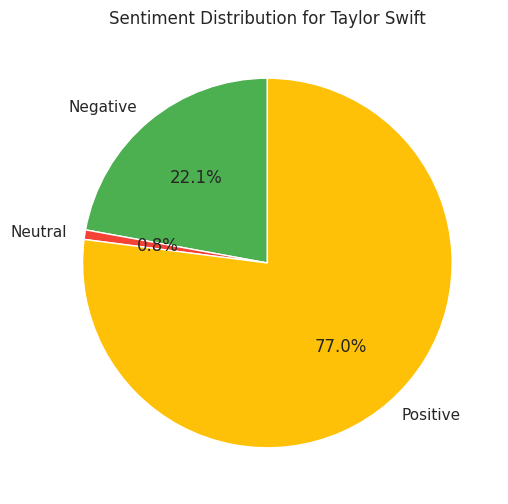

In [21]:
# Plot pie chart for Taylor Swift
plt.figure(figsize=(6, 6))
plt.pie(artist_sentiment_distribution.loc['TaylorSwift'], labels=artist_sentiment_distribution.columns,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution for Taylor Swift')
plt.show()

###*5. Circular Graph for Emotions by Artist*

In [22]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV files
files = ['/content/ArianaGrande.csv', '/content/BillieEilish.csv', '/content/EdSheeran.csv', '/content/Eminem.csv', '/content/TaylorSwift.csv']
dfs = [pd.read_csv(file) for file in files]

# Combine the DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Display column names to verify correct ones
print("Columns in the combined DataFrame:", df_combined.columns)

# Handle missing values in the 'Lyric' column by replacing NaN with an empty string
df_combined['Lyric'] = df_combined['Lyric'].fillna('')

# Ensure 'Lyric' column is of string type
df_combined['Lyric'] = df_combined['Lyric'].astype(str)

# Define sentiment analysis function
def categorize_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.2:
        return 'happiness'
    elif analysis.sentiment.polarity < -0.2:
        return 'sadness'
    elif 'angry' in text.lower():
        return 'anger'
    elif 'anxious' in text.lower():
        return 'anxiety'
    elif 'revenge' in text.lower():
        return 'revenge'
    elif 'love' in text.lower():
        return 'love'
    elif 'depressed' in text.lower():
        return 'depression'
    return 'neutral'

# Apply sentiment analysis to the lyrics column
df_combined['sentiment_category'] = df_combined['Lyric'].apply(categorize_sentiment)

# Compute the sentiment distribution for each artist
artist_sentiment_distribution = df_combined.groupby('Artist')['sentiment_category'].value_counts().unstack().fillna(0)
artist_sentiment_distribution = artist_sentiment_distribution.reindex(columns=['sadness', 'happiness', 'anger', 'anxiety', 'revenge', 'love', 'depression'], fill_value=0)


Columns in the combined DataFrame: Index(['Artist', 'Title', 'Album', 'Date', 'Lyric', 'Year', 'Unnamed: 0'], dtype='object')


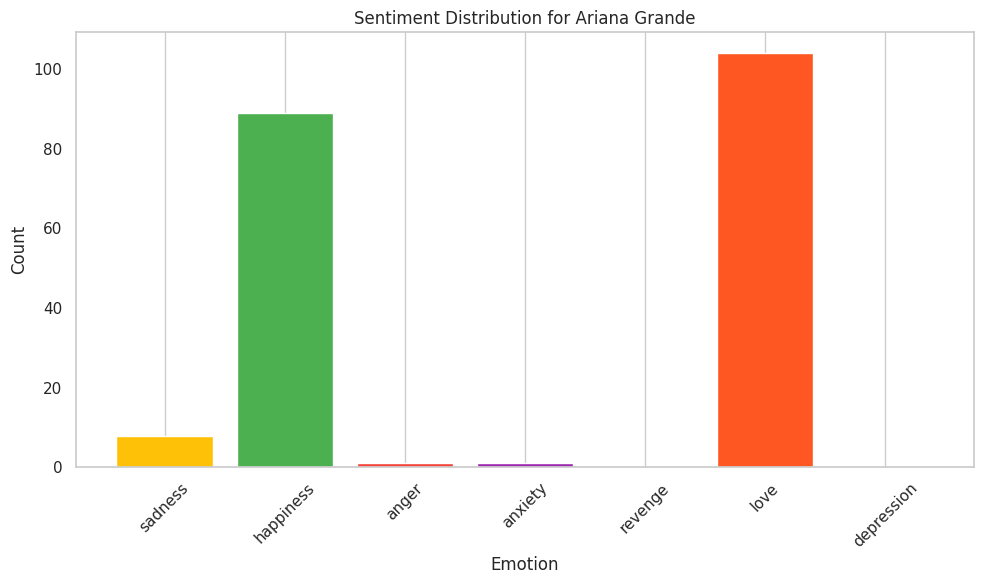

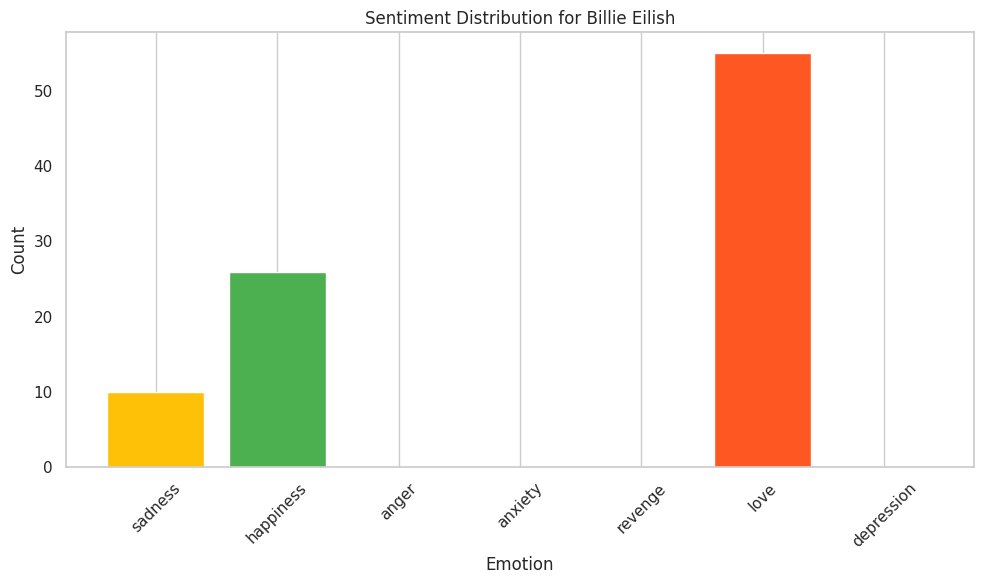

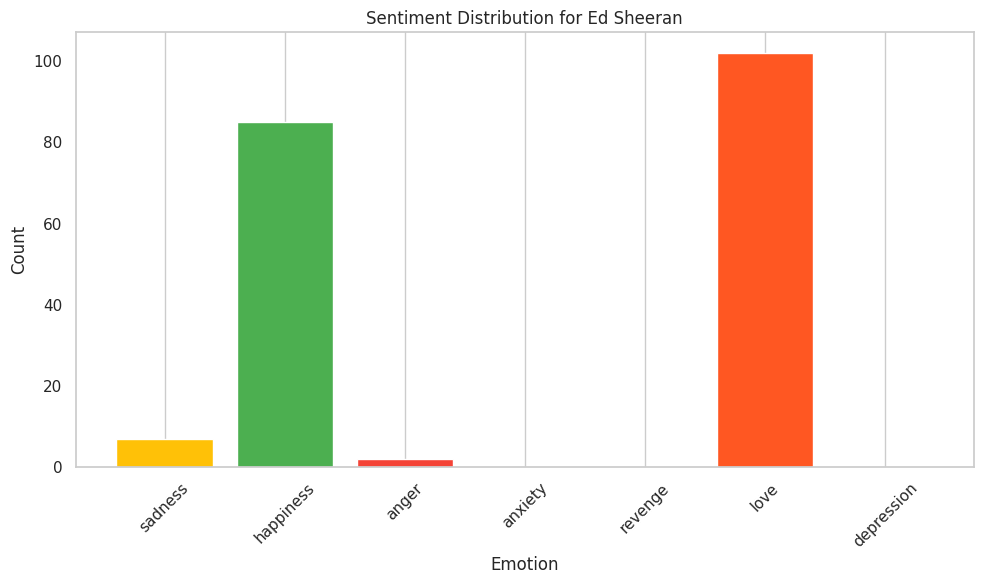

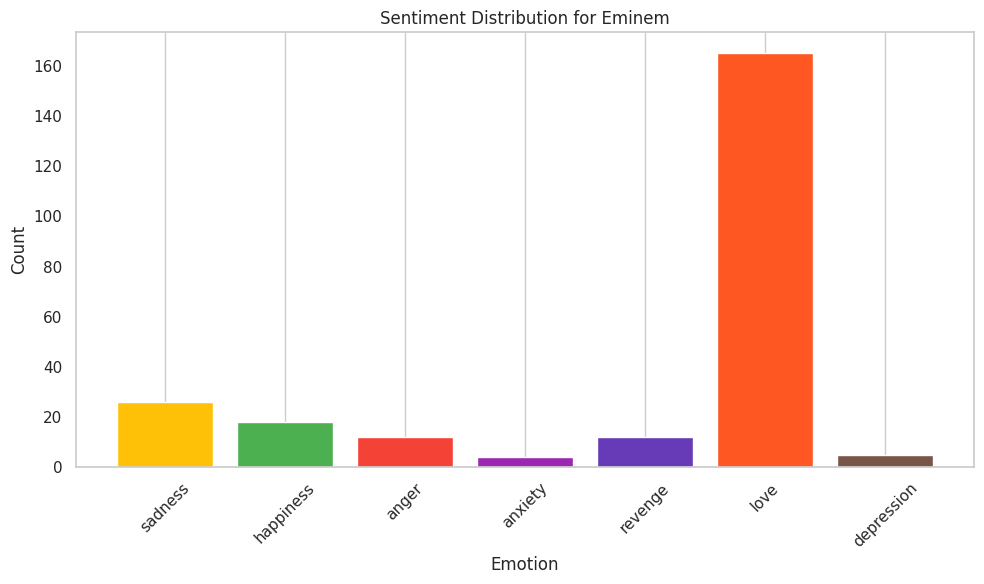

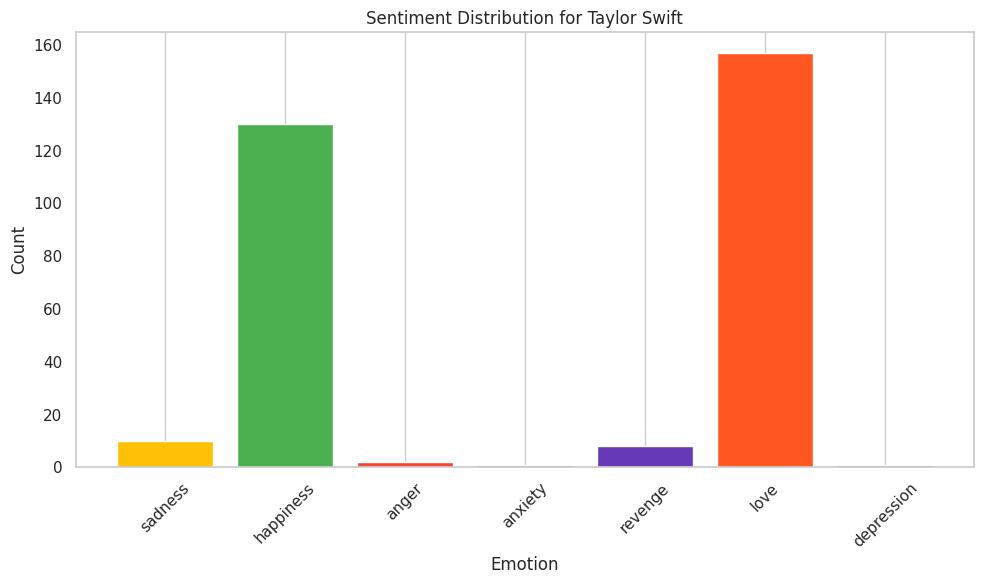

In [23]:
# Bar Plots for Each Artist
for artist in artist_sentiment_distribution.index:
    plt.figure(figsize=(10, 6))
    plt.bar(artist_sentiment_distribution.columns, artist_sentiment_distribution.loc[artist], color=['#FFC107', '#4CAF50', '#F44336', '#9C27B0', '#673AB7', '#FF5722', '#795548'])
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title(f'Sentiment Distribution for {artist}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

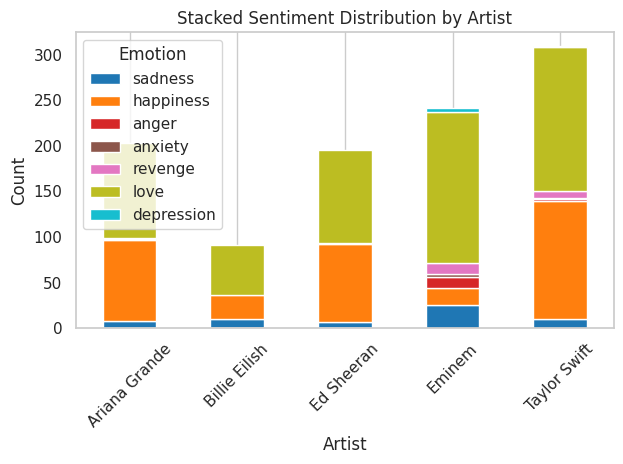

In [24]:
# Stacked Bar Plots
plt.figure(figsize=(12, 8))
artist_sentiment_distribution.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Stacked Sentiment Distribution by Artist')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

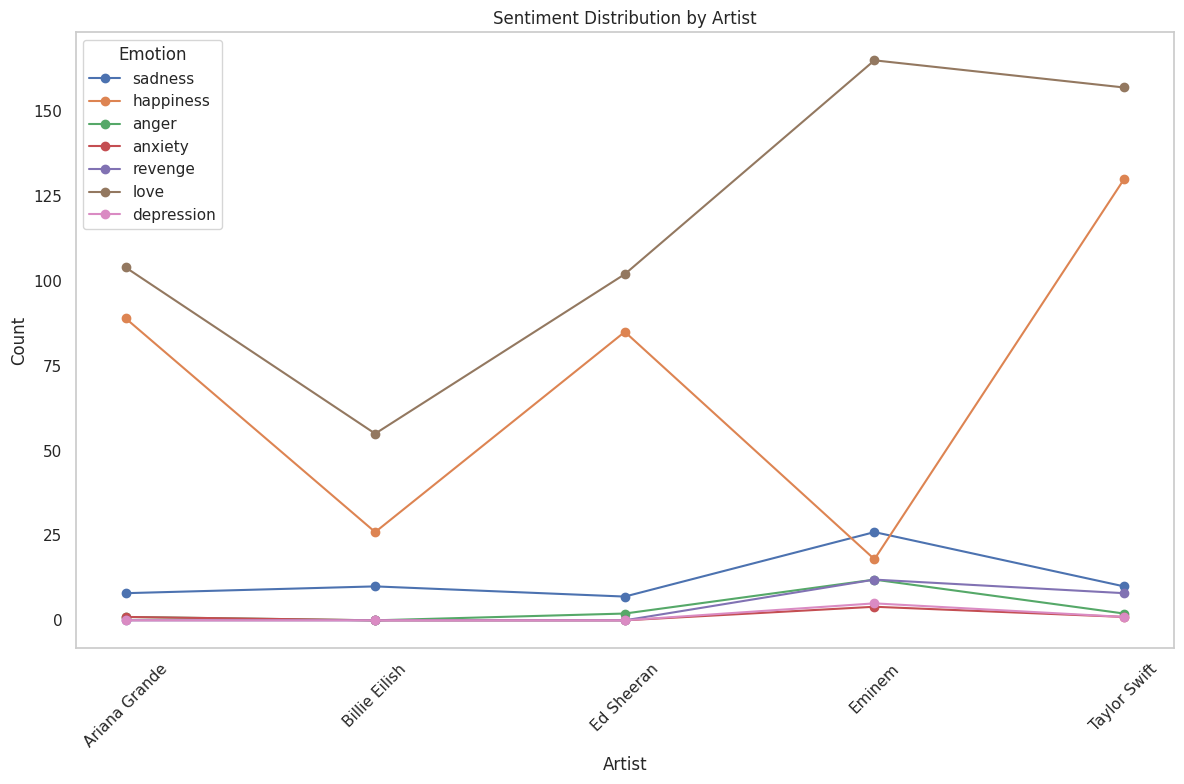

In [25]:
# Line Plots for Each Emotion
plt.figure(figsize=(12, 8))
for emotion in artist_sentiment_distribution.columns:
    plt.plot(artist_sentiment_distribution.index, artist_sentiment_distribution[emotion], marker='o', label=emotion)
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Artist')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

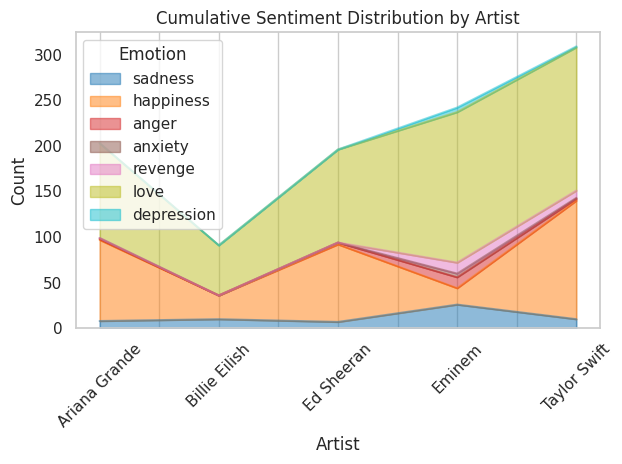

In [26]:
# Area Plot
plt.figure(figsize=(12, 8))
artist_sentiment_distribution.plot(kind='area', alpha=0.5, colormap='tab10')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Cumulative Sentiment Distribution by Artist')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###*6. Emoji-based Graphs*

In [28]:
pip install pillow

In [27]:
pip install emoji textblob matplotlib pandas


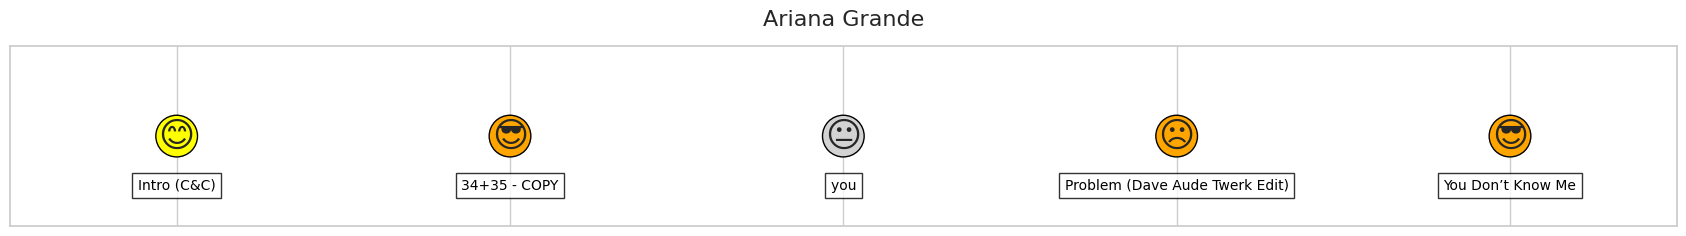

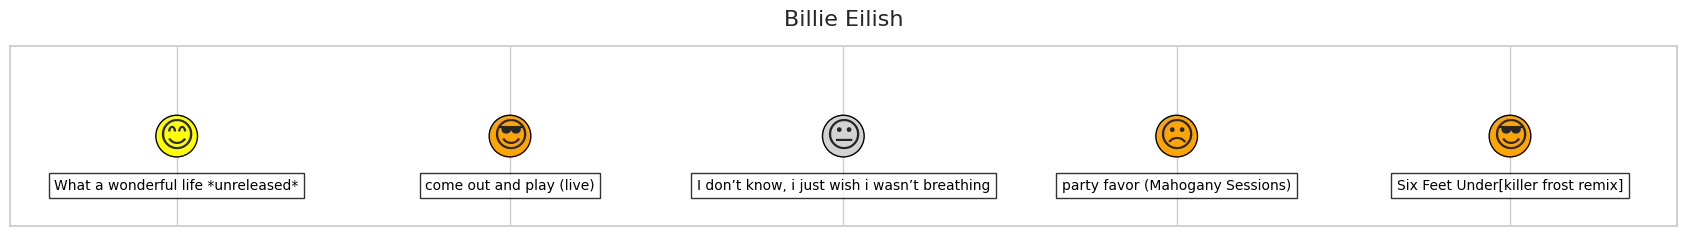

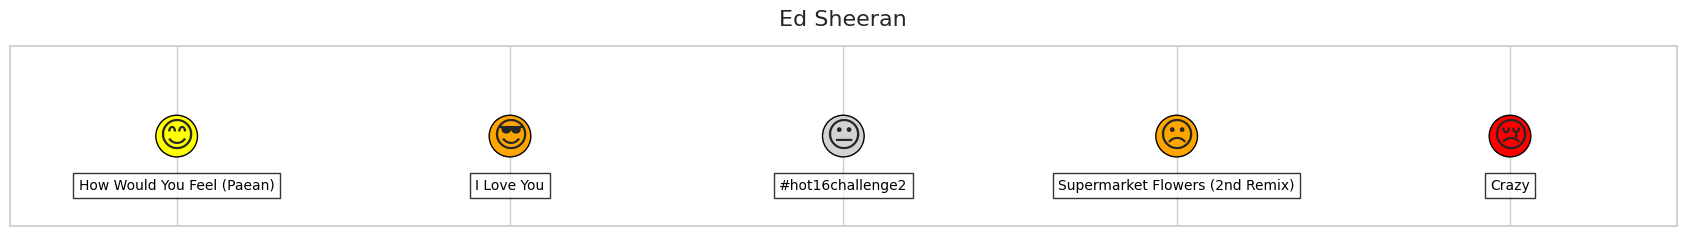

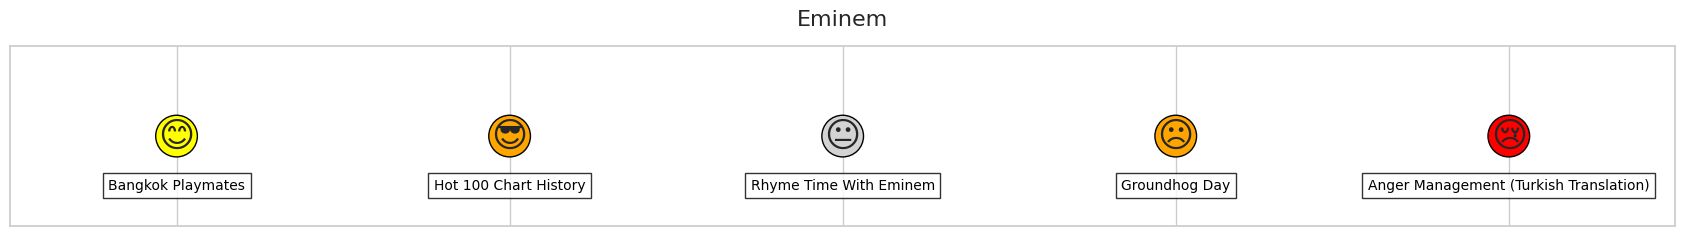

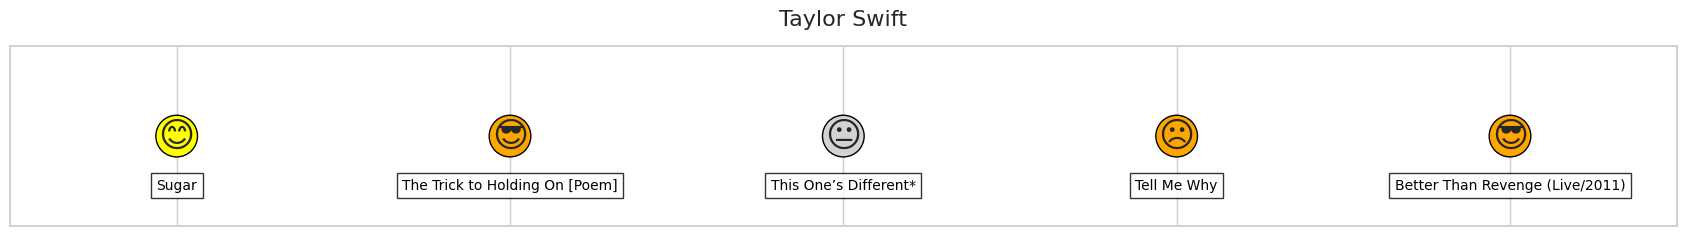

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import emoji

# Load CSV files and combine DataFrames
files = [
    '/content/ArianaGrande.csv',
    '/content/BillieEilish.csv',
    '/content/EdSheeran.csv',
    '/content/Eminem.csv',
    '/content/TaylorSwift.csv'
]
dfs = [pd.read_csv(file) for file in files]
df_combined = pd.concat(dfs, ignore_index=True)

# Fill NaN values with an empty string
df_combined['Title'] = df_combined['Title'].fillna('')
df_combined['Lyric'] = df_combined['Lyric'].fillna('')

# Sentiment analysis function
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0.5:
            return 'Very Positive'
        elif 0 < polarity <= 0.5:
            return 'Positive'
        elif -0.5 <= polarity < 0:
            return 'Negative'
        elif polarity < -0.5:
            return 'Very Negative'
        else:
            return 'Neutral'
    return 'Unknown'

# Apply sentiment analysis
df_combined['Sentiment'] = df_combined.apply(lambda row: analyze_sentiment(str(row['Title']) + " " + str(row['Lyric'])), axis=1)

# Define emojis and colors using digital face emojis
emoji_sentiments = {
    'Very Positive': emoji.emojize(':smiling_face_with_smiling_eyes:'),
    'Positive': emoji.emojize(':smiling_face_with_sunglasses:'),
    'Neutral': emoji.emojize(':neutral_face:'),
    'Negative': emoji.emojize(':frowning_face:'),
    'Very Negative': emoji.emojize(':crying_face:')
}

colors_sentiments = {
    'Very Positive': 'yellow',
    'Positive': 'orange',
    'Neutral': 'lightgrey',
    'Negative': 'orange',
    'Very Negative': 'red'
}

# Function to visualize sentiment analysis for each artist
def visualize_artist_sentiment(ax, df_artist, artist_name):
    # Group songs by sentiment
    grouped = df_artist.groupby('Sentiment')

    # Ensure a variety of sentiments are selected
    selected_songs = []
    for sentiment in ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']:
        if sentiment in grouped.groups:
            selected_songs.append(grouped.get_group(sentiment).sample(n=1))

    # If there are fewer than 5 selected songs, fill with random samples
    remaining_songs = df_artist[~df_artist.index.isin(pd.concat(selected_songs).index)].sample(n=5-len(selected_songs))
    selected_songs.append(remaining_songs)

    artist_df = pd.concat(selected_songs)

    # Create visualization data
    visualization_data = []
    for _, row in artist_df.iterrows():
        sentiment = row['Sentiment']
        emoji_label = emoji_sentiments.get(sentiment, emoji.emojize(':question:'))
        color = colors_sentiments.get(sentiment, 'grey')
        visualization_data.append({
            'Title': row['Title'],
            'Emoji': emoji_label,
            'Color': color
        })

    visualization_df = pd.DataFrame(visualization_data)

    x = np.arange(len(visualization_df))
    emojis = visualization_df['Emoji'].tolist()
    titles = visualization_df['Title'].tolist()
    colors = visualization_df['Color'].tolist()

    # Scatter plot with adjusted size
    ax.scatter(x, [1] * len(x), s=900, color=colors, edgecolor='black')

    # Add emojis and titles
    for i, (emoji_label, title) in enumerate(zip(emojis, titles)):
        ax.text(x[i], 1, emoji_label, fontsize=25, ha='center', va='center')

        # Adjust title placement with more space between title and graph
        ax.text(x[i], 0.97, title, fontsize=10, ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    # Formatting plot
    ax.set_yticks([])
    ax.set_xticks(x)
    ax.set_xticklabels([''] * len(x))
    ax.set_title(f'{artist_name}', fontsize=16, pad=15)  # Adjust padding for spacing between artist title and song titles
    ax.set_xlim(-0.5, len(x) - 0.5)

# Create a grid layout for each artist separately
artists = df_combined['Artist'].unique()
for artist in artists:
    fig, ax = plt.subplots(figsize=(18, 3.5))  # Adjusted height and width for better spacing
    artist_df = df_combined[df_combined['Artist'] == artist]
    visualize_artist_sentiment(ax, artist_df, artist)
    plt.tight_layout(pad=4)  # Adjust layout padding to ensure good spacing between elements
    plt.show()


##*Genre Distribution by Artist*

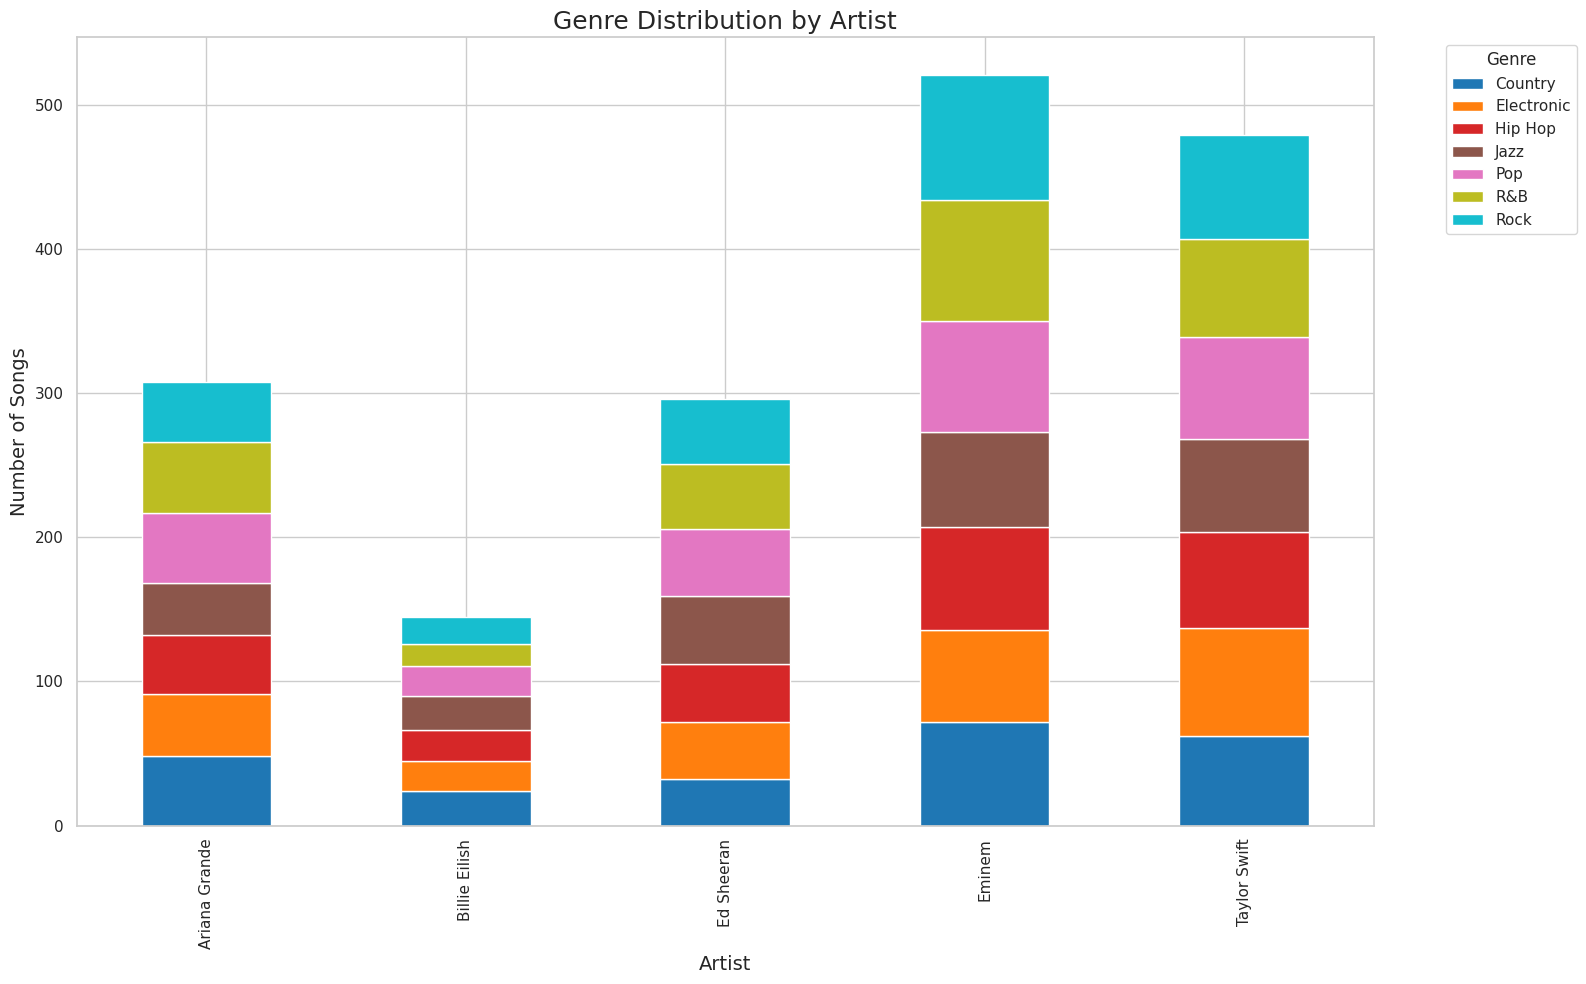

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load CSV files and combine DataFrames
files = [
    '/content/ArianaGrande.csv',
    '/content/BillieEilish.csv',
    '/content/EdSheeran.csv',
    '/content/Eminem.csv',
    '/content/TaylorSwift.csv'
]
dfs = [pd.read_csv(file) for file in files]
df_combined = pd.concat(dfs, ignore_index=True)

# Fill NaN values with an empty string
df_combined['Artist'] = df_combined['Artist'].fillna('Unknown')

# Create a mock 'Genre' column with top 7 main genres
top_genres = ['Pop', 'Rock', 'Hip Hop', 'R&B', 'Country', 'Electronic', 'Jazz']
df_combined['Genre'] = [random.choice(top_genres) for _ in range(len(df_combined))]

# Group by Artist and Genre to get the count of each genre per artist
genre_distribution = df_combined.groupby(['Artist', 'Genre']).size().unstack(fill_value=0)

# Plot the genre distribution for each artist
genre_distribution.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab10')

# Set plot title and labels
plt.title('Genre Distribution by Artist', fontsize=18)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#***Literary Sentiment Analysis:***

In [31]:
pip install pandas nltk sklearn matplotlib seaborn wordcloud

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


##*Import Libraries*

In [32]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##*Download NLTK data*

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##*Load data*

In [34]:
df = pd.read_csv('/content/Book_Details.csv')


In [35]:
# Check for missing values and drop if necessary
df.dropna(subset=['book_details', 'genres', 'author'], inplace=True)

##*Preprocessing*

In [36]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean_details'] = df['book_details'].apply(preprocess)

##*Vectorization*

In [37]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_details'])
y = df['average_rating'] > 3.5  # Assuming average rating > 3.5 is positive sentiment

##*Train-test split*

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##*Model*

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

##*Predictions*

In [40]:
y_pred = model.predict(X_test)


##*Evaluation*

In [41]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy Score: 0.9451998351874743
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       263
        True       0.95      1.00      0.97      4591

    accuracy                           0.95      4854
   macro avg       0.47      0.50      0.49      4854
weighted avg       0.89      0.95      0.92      4854



##*Confusion Matrix Plot*

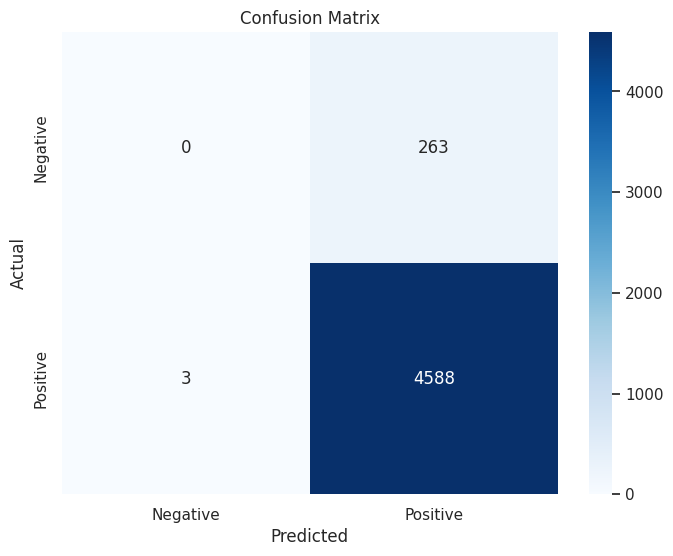

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##*Word Cloud for Positive Reviews*

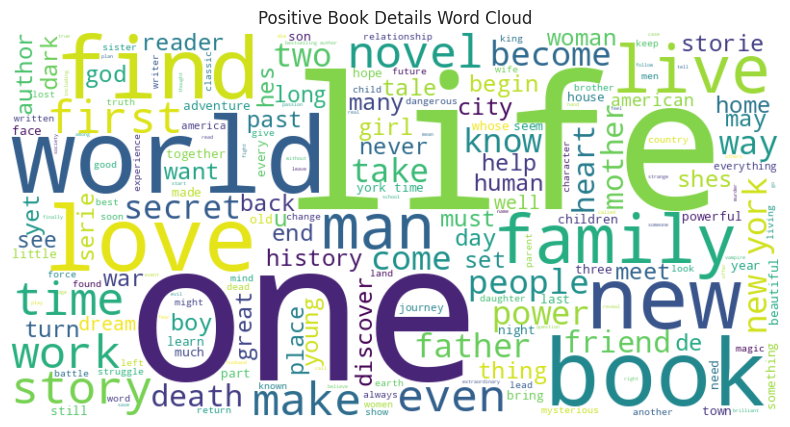

In [43]:
positive_details = ' '.join(df[df['average_rating'] > 3.5]['clean_details'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_details)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Book Details Word Cloud')
plt.show()

##*Word Cloud for Negative Reviews*

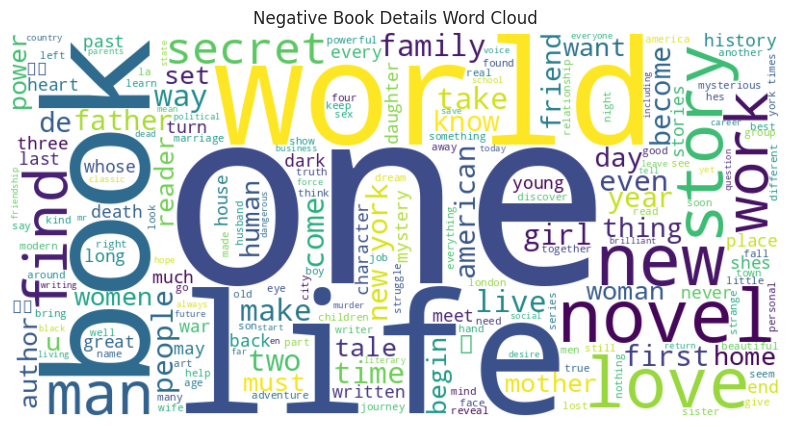

In [44]:
negative_details = ' '.join(df[df['average_rating'] <= 3.5]['clean_details'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_details)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Book Details Word Cloud')
plt.show()

##*Author Book Totals*

<ipython-input-45-adb84bdbb241>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=author_counts.index, x=author_counts.values, palette='inferno')


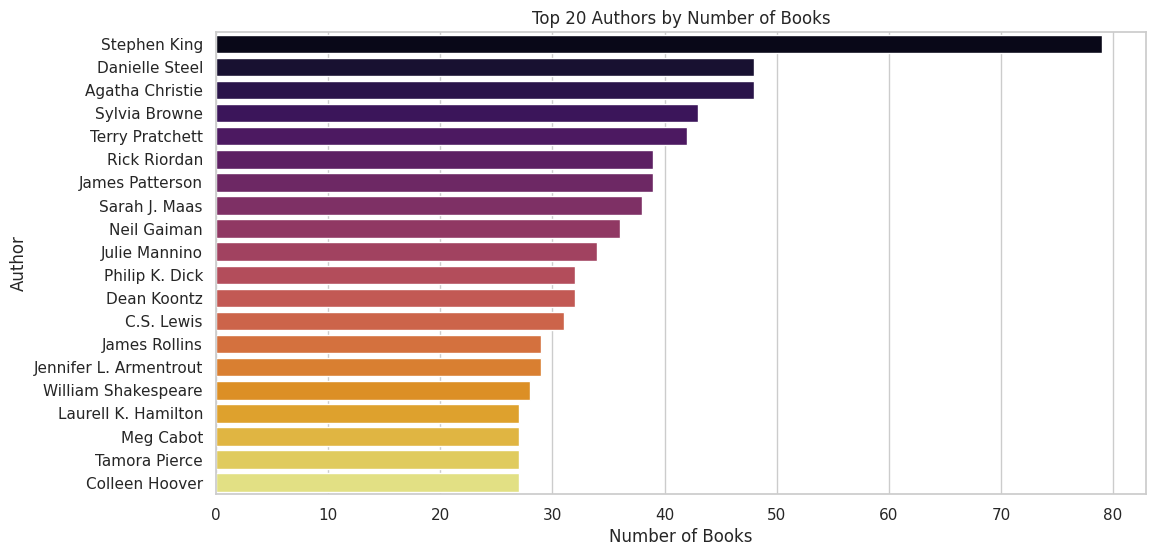

In [45]:
plt.figure(figsize=(12, 6))
author_counts = df['author'].value_counts().head(20)
sns.barplot(y=author_counts.index, x=author_counts.values, palette='inferno')
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

##*Sentiment Distribution by Author*

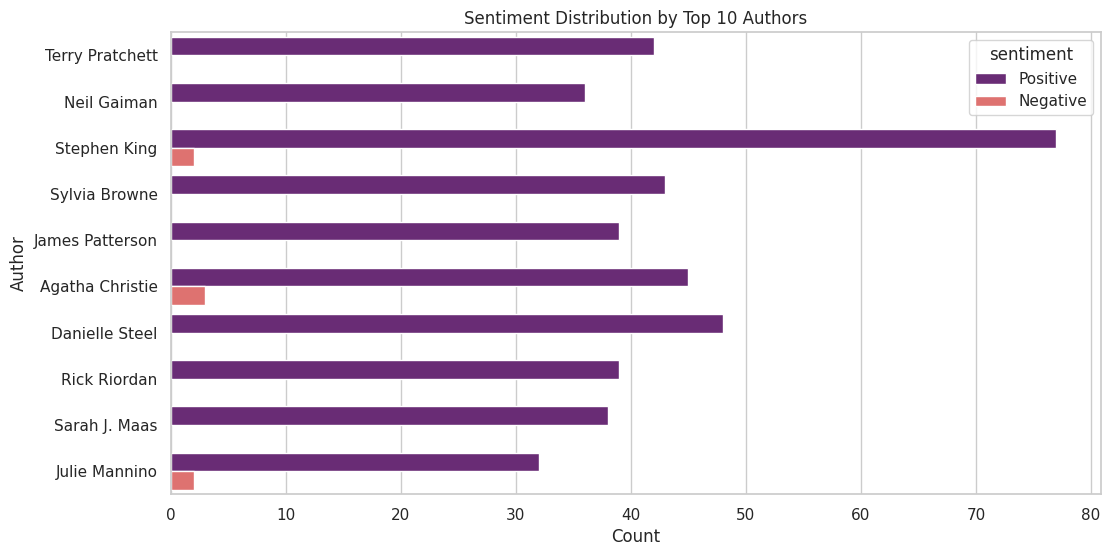

In [62]:
# Calculate sentiment for top authors
df_top_authors['sentiment'] = df_top_authors['average_rating'].apply(lambda rating: 'Positive' if rating > 3.5 else 'Negative')

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='author', hue='sentiment', data=df_top_authors, palette='magma')
plt.title('Sentiment Distribution by Top 10 Authors')
plt.xlabel('Count')
plt.ylabel('Author')
plt.show()


##*EDA - Average Rating Distribution*

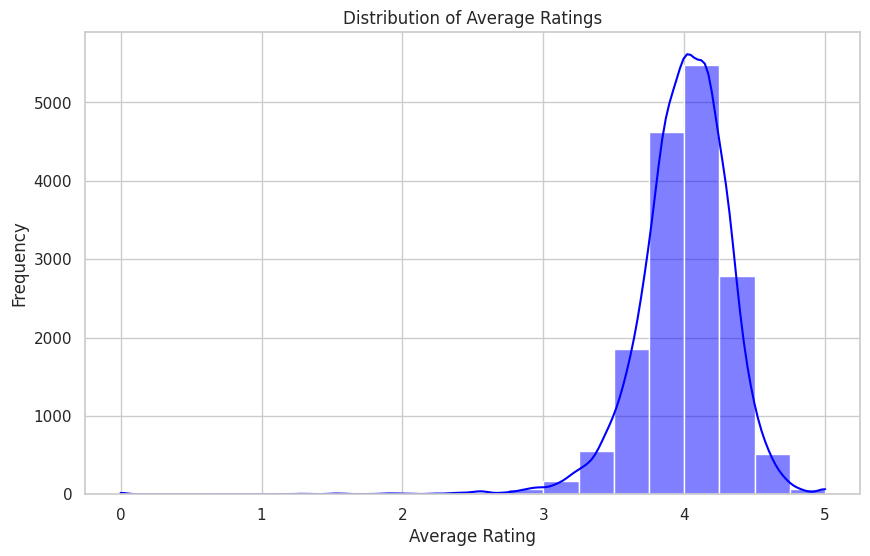

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [50]:
pip install transformers nltk pandas matplotlib seaborn

##*Summarizing Top 5 Books*

In [51]:
import pandas as pd

# Load data from the specified path
file_path = '/content/Book_Details.csv'
df = pd.read_csv(file_path)

# Check for missing values and drop if necessary
df.dropna(subset=['book_details'], inplace=True)

# Example: Select different 5 books based on a different criterion
# Here, we're choosing books from a specific genre or with a specific publication year.
# Adjust the filter according to your needs.

# For example, let's select books from the 'Fiction' genre
df_genre_filtered = df[df['genres'].str.contains('Fiction', na=False)]

# Further limit to 5 books for demonstration purposes
different_5_books = df_genre_filtered.head(5)

# Save this subset to a new CSV file
different_5_books.to_csv('/content/Different_5_Books.csv', index=False)


##*Summarize the Selected Books*

In [52]:
from transformers import pipeline

# Load the new subset of books
different_5_books = pd.read_csv('/content/Different_5_Books.csv')

# Initialize the summarization pipeline with an explicit model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize text
def summarize_text(text):
    try:
        summary = summarizer(text, max_length=150, min_length=30, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        print(f"Error summarizing text: {e}")
        return ""

# Apply summarization
different_5_books['summary'] = different_5_books['book_details'].apply(lambda x: summarize_text(x))

# Save the summarized data to a new CSV file
different_5_books.to_csv('/content/Different_5_Books_Summarized.csv', index=False)

print("Summarization complete for different 5 books. Results saved to 'Different_5_Books_Summarized.csv'.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)
Your max_length is set to 150, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


Summarization complete for different 5 books. Results saved to 'Different_5_Books_Summarized.csv'.


##*Analyze Sentiment*

In [53]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK data
nltk.download('vader_lexicon')

# Load the summarized data
different_5_books = pd.read_csv('/content/Different_5_Books_Summarized.csv')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    try:
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return 0

# Apply sentiment analysis
different_5_books['sentiment_score'] = different_5_books['summary'].apply(lambda x: analyze_sentiment(x))

# Determine sentiment based on score
different_5_books['sentiment'] = different_5_books['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Save the sentiment results to a new CSV file
different_5_books.to_csv('/content/Different_5_Books_Sentiment.csv', index=False)

print("Sentiment analysis complete for different 5 books. Results saved to 'Different_5_Books_Sentiment.csv'.")


Sentiment analysis complete for different 5 books. Results saved to 'Different_5_Books_Sentiment.csv'.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##*Visualize Results*

<ipython-input-54-da0bdfbe658e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=different_5_books, palette='viridis')


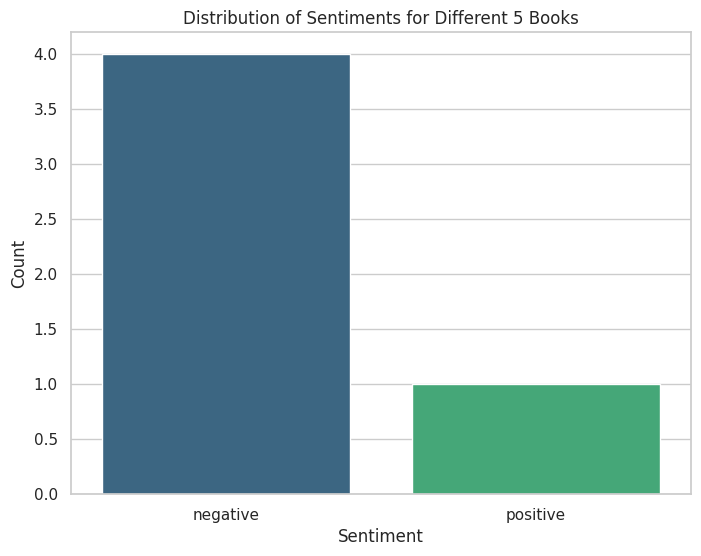

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment results
different_5_books = pd.read_csv('/content/Different_5_Books_Sentiment.csv')

# Visualization 1: Distribution of Sentiments for Different 5 Books
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=different_5_books, palette='viridis')
plt.title('Distribution of Sentiments for Different 5 Books')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

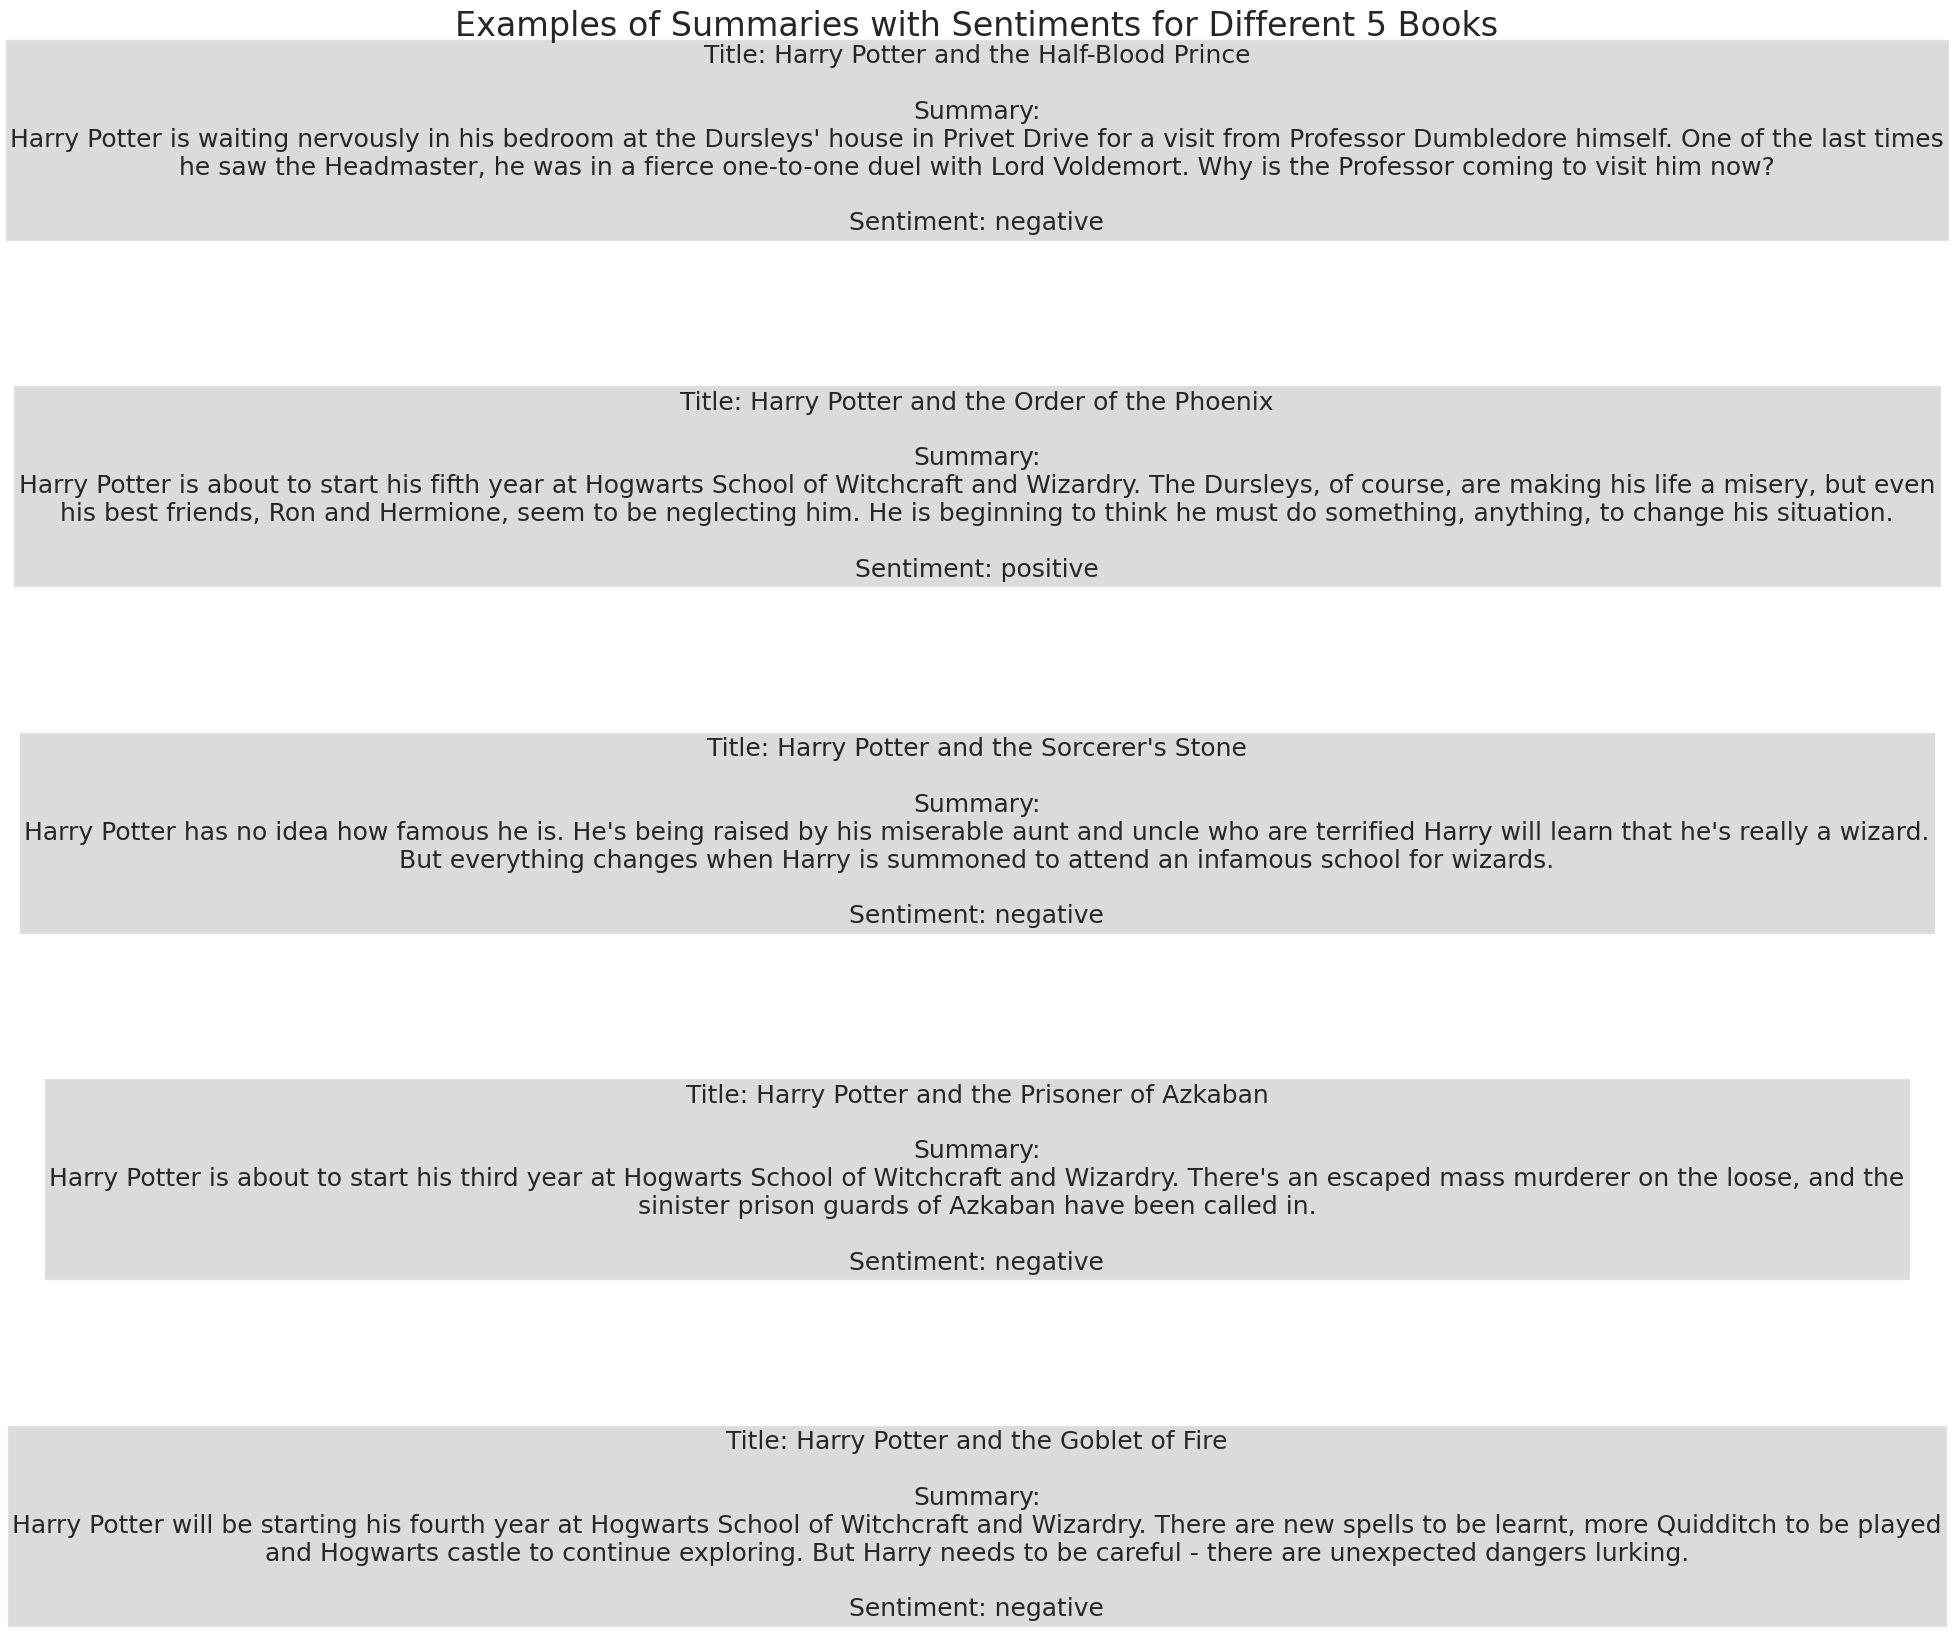

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment results
different_5_books = pd.read_csv('/content/Different_5_Books_Sentiment.csv')

# Visualization 2: Example of Summaries with Sentiments for Different 5 Books
plt.figure(figsize=(20, 15))  # Increase figure size for better readability

# Loop through the top 5 books and add text to the plot
for i in range(len(different_5_books)):
    plt.text(0.5, 1-i*0.3,  # Adjust vertical spacing between text boxes
             f"Title: {different_5_books.iloc[i]['book_title']}\n\n"
             f"Summary:\n{different_5_books.iloc[i]['summary']}\n\n"
             f"Sentiment: {different_5_books.iloc[i]['sentiment']}",
             fontsize=18,  # Increase font size for better readability
             ha='center',
             va='top',
             bbox=dict(facecolor='lightgray', alpha=0.8),  # Slightly darker background for better contrast
             wrap=True)  # Ensure text wraps within the box

plt.axis('off')
plt.title('Examples of Summaries with Sentiments for Different 5 Books', fontsize=24)  # Increase title font size
plt.show()


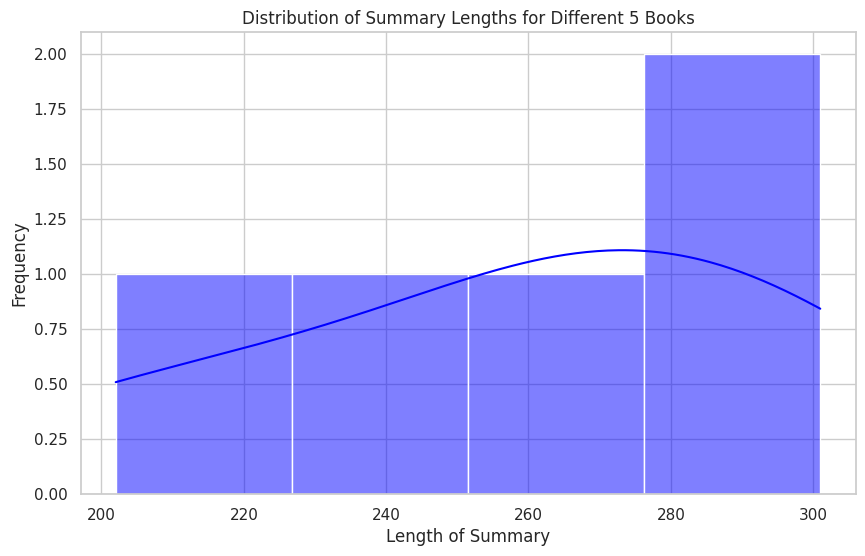

In [56]:
# Visualization 3: Summary Length Distribution
different_5_books['summary_length'] = different_5_books['summary'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(different_5_books['summary_length'], kde=True, color='blue')
plt.title('Distribution of Summary Lengths for Different 5 Books')
plt.xlabel('Length of Summary')
plt.ylabel('Frequency')
plt.show()

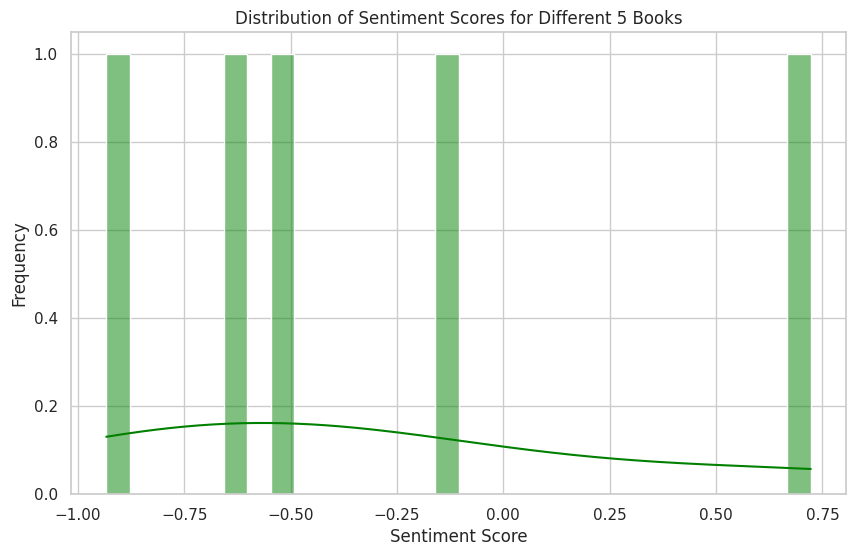

In [57]:
# Visualization 4: Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(different_5_books['sentiment_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentiment Scores for Different 5 Books')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#***Song Lyrics Sentiment Analysis VS Literary Sentiment Analysis***

Index(['Artist', 'Title', 'Album', 'Date', 'Lyric', 'Year', 'Unnamed: 0',
       'book_id', 'cover_image_uri', 'format', 'publication_info',
       'authorlink', 'author', 'num_pages', 'genres', 'num_ratings',
       'num_reviews', 'average_rating', 'rating_distribution'],
      dtype='object')


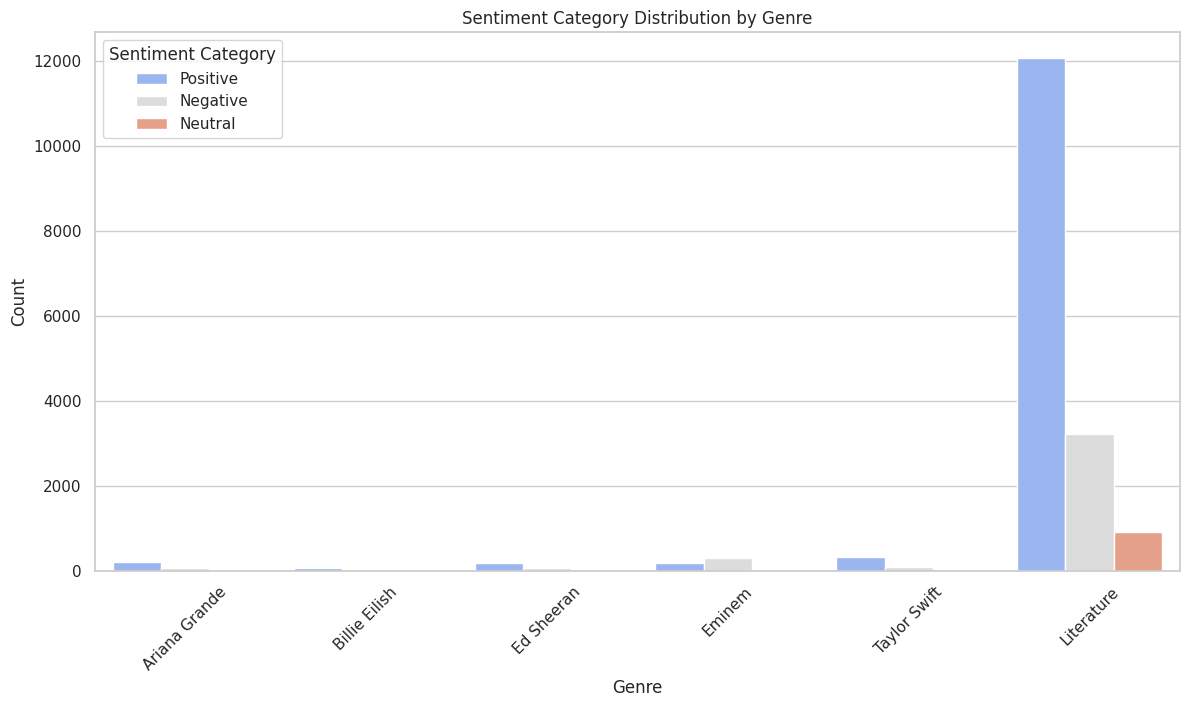

In [58]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
files = ['/content/ArianaGrande.csv', '/content/BillieEilish.csv', '/content/EdSheeran.csv', '/content/Eminem.csv', '/content/TaylorSwift.csv']
labels = ['Ariana Grande', 'Billie Eilish', 'Ed Sheeran', 'Eminem', 'Taylor Swift']

# Load song lyrics datasets
dfs = [pd.read_csv(file) for file in files]

# Add a label column to each DataFrame
for df, label in zip(dfs, labels):
    df['Artist'] = label

# Load literary text dataset
literature_df = pd.read_csv('/content/Book_Details.csv')
literature_df['Artist'] = 'Literature'
literature_df = literature_df.rename(columns={'book_title': 'Title', 'book_details': 'Lyric'})

# Combine all datasets
all_dfs = dfs + [literature_df]
combined_df = pd.concat(all_dfs, ignore_index=True)

# Check column names
print(combined_df.columns)

# Prepare text for sentiment analysis
combined_df['Text'] = combined_df['Lyric']  # Assuming 'Lyric' contains the text for sentiment analysis

# Sentiment Analysis Function
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    return None

# Apply sentiment analysis
combined_df['Sentiment_Polarity'] = combined_df['Text'].apply(analyze_sentiment)

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

combined_df['Sentiment_Category'] = combined_df['Sentiment_Polarity'].apply(categorize_sentiment)

# Add a Genre column for comparison
combined_df['Genre'] = combined_df['Artist']

# Plot Sentiment Analysis: Positive vs Negative
plt.figure(figsize=(14, 7))
sns.countplot(data=combined_df, x='Genre', hue='Sentiment_Category', palette='coolwarm')
plt.title('Sentiment Category Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=45)
plt.show()


Index(['Artist', 'Title', 'Album', 'Date', 'Lyric', 'Year', 'Unnamed: 0',
       'book_id', 'cover_image_uri', 'format', 'publication_info',
       'authorlink', 'author', 'num_pages', 'genres', 'num_ratings',
       'num_reviews', 'average_rating', 'rating_distribution'],
      dtype='object')


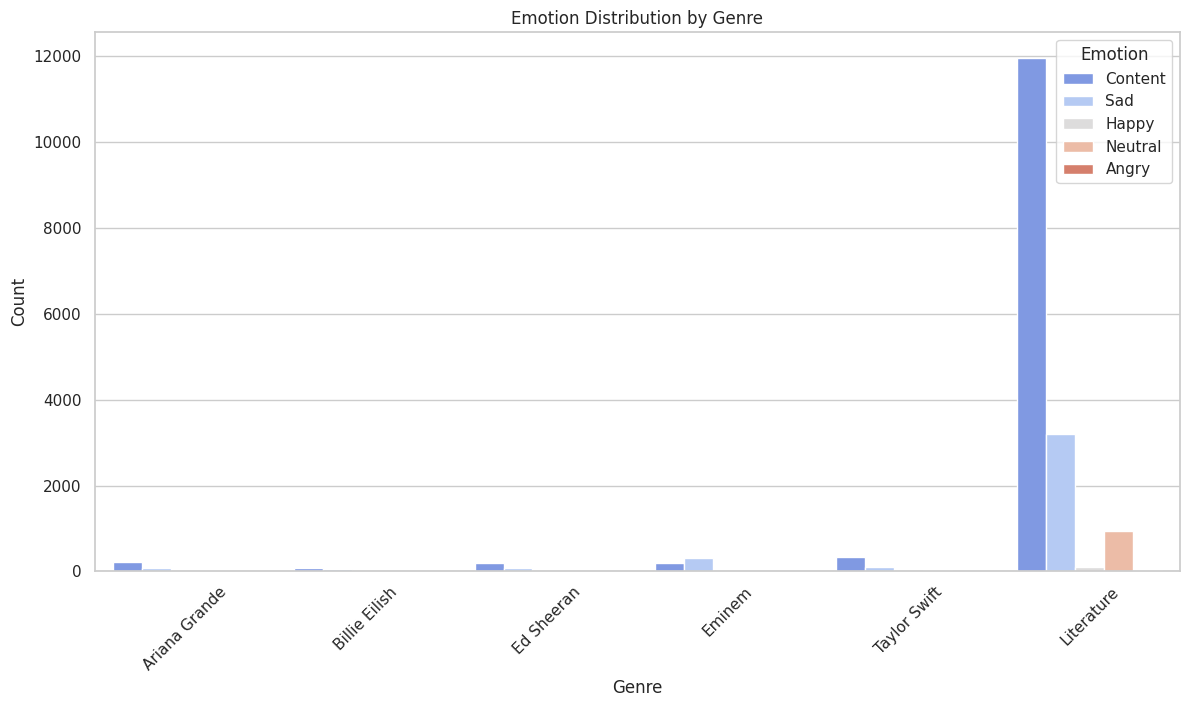

In [59]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
files = ['/content/ArianaGrande.csv', '/content/BillieEilish.csv', '/content/EdSheeran.csv', '/content/Eminem.csv', '/content/TaylorSwift.csv']
labels = ['Ariana Grande', 'Billie Eilish', 'Ed Sheeran', 'Eminem', 'Taylor Swift']

# Load song lyrics datasets
dfs = [pd.read_csv(file) for file in files]

# Add a label column to each DataFrame
for df, label in zip(dfs, labels):
    df['Artist'] = label

# Load literary text dataset
literature_df = pd.read_csv('/content/Book_Details.csv')
literature_df['Artist'] = 'Literature'
literature_df = literature_df.rename(columns={'book_title': 'Title', 'book_details': 'Lyric'})

# Combine all datasets
all_dfs = dfs + [literature_df]
combined_df = pd.concat(all_dfs, ignore_index=True)

# Check column names
print(combined_df.columns)

# Prepare text for sentiment analysis
combined_df['Text'] = combined_df['Lyric']  # Assuming 'Lyric' contains the text for sentiment analysis

# Sentiment Analysis Function
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    return None

# Apply sentiment analysis
combined_df['Sentiment_Polarity'] = combined_df['Text'].apply(analyze_sentiment)

# Categorize emotions based on sentiment polarity
def categorize_emotion(polarity):
    if polarity > 0.5:
        return 'Happy'
    elif 0 < polarity <= 0.5:
        return 'Content'
    elif -0.5 <= polarity < 0:
        return 'Sad'
    elif polarity < -0.5:
        return 'Angry'
    else:
        return 'Neutral'

combined_df['Emotion'] = combined_df['Sentiment_Polarity'].apply(categorize_emotion)

# Add a Genre column for comparison
combined_df['Genre'] = combined_df['Artist']

# Plot Emotions Distribution
plt.figure(figsize=(14, 7))
sns.countplot(data=combined_df, x='Genre', hue='Emotion', palette='coolwarm')
plt.title('Emotion Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.show()
